## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Load & Explore data

In [2]:
data=pd.read_csv('D:\Projects\python\MeriSkill\project 3/HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# To show basic info about datatype
data.info()
shape = data.shape
print(f'\n Number of Rows = {shape[0]}\n Number of columns = {shape[1]} ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [5]:
data.duplicated().sum()

0

In [6]:
# To display stats about the data
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Check for null values 
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## Exploratory Analysis

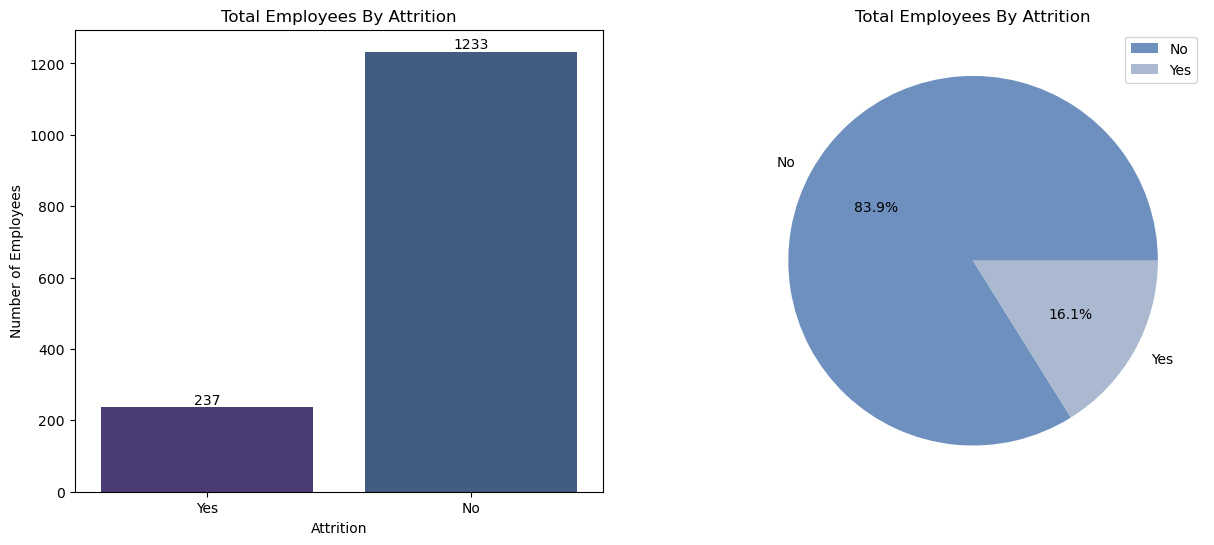

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=data, x='Attrition',palette = sns.color_palette('viridis'),ax=ax[0])
ax[0].set_xlabel('Attrition')
ax[0].set_ylabel('Number of Employees')
ax[0].set_title('Total Employees By Attrition')
for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

attr_count = data['Attrition'].value_counts()
ax[1].pie(attr_count, labels=attr_count.index, autopct='%1.1f%%', colors=sns.color_palette('vlag'))
ax[1].legend(labels=attr_count.index)
ax[1].set_title('Total Employees By Attrition')

plt.show()

- The graph show that 237 people have left the organization which represent 16.1% of the total employees while the other 1233  which represent 83.9% are still active inside the organization
- The turnover in the company is slightly high

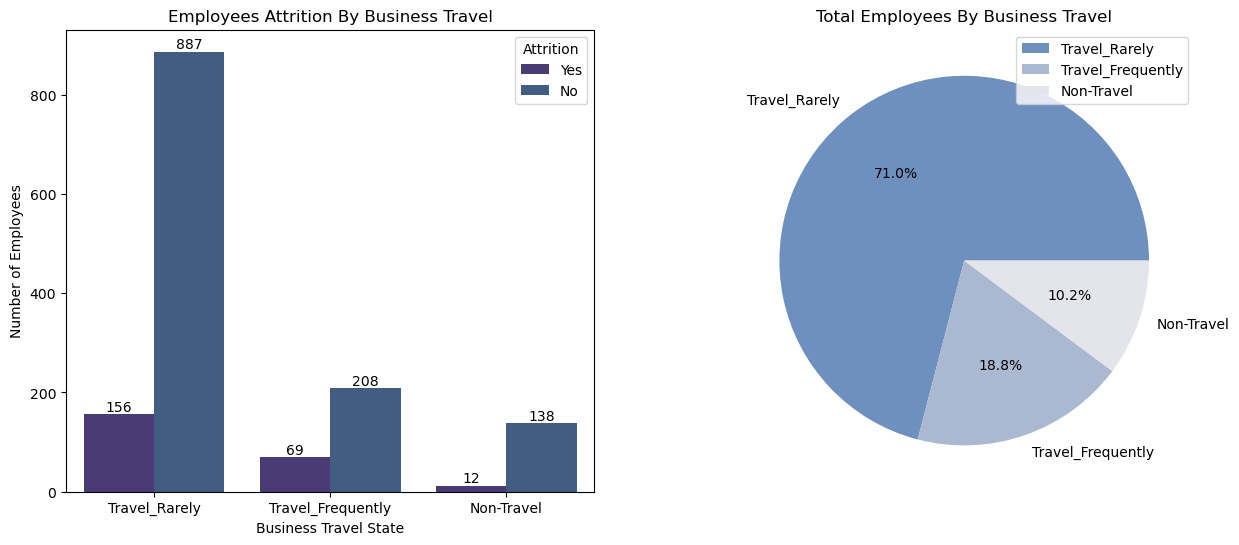

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=data, x='BusinessTravel',hue='Attrition', palette =sns.color_palette('viridis'), ax=ax[0])
ax[0].set_xlabel('Business Travel State')
ax[0].set_ylabel('Number of Employees')
ax[0].set_title('Employees Attrition By Business Travel')
for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

bt_count = data['BusinessTravel'].value_counts()
ax[1].pie(bt_count, labels=bt_count.index, autopct='%1.1f%%', colors=sns.color_palette('vlag'))
ax[1].legend(labels=bt_count.index, loc='upper right')
ax[1].set_title('Total Employees By Business Travel')

plt.show()

- The graph shows that the company has more no.of employees who travel rarely and present the majority with 71% of total employees
- This means that the company's major activties & oprerations required less travel rate
- Non-travel employees have least count with only 10.2% as well as least attrition
- There are more employees travels rarely and are not satisfied with their job

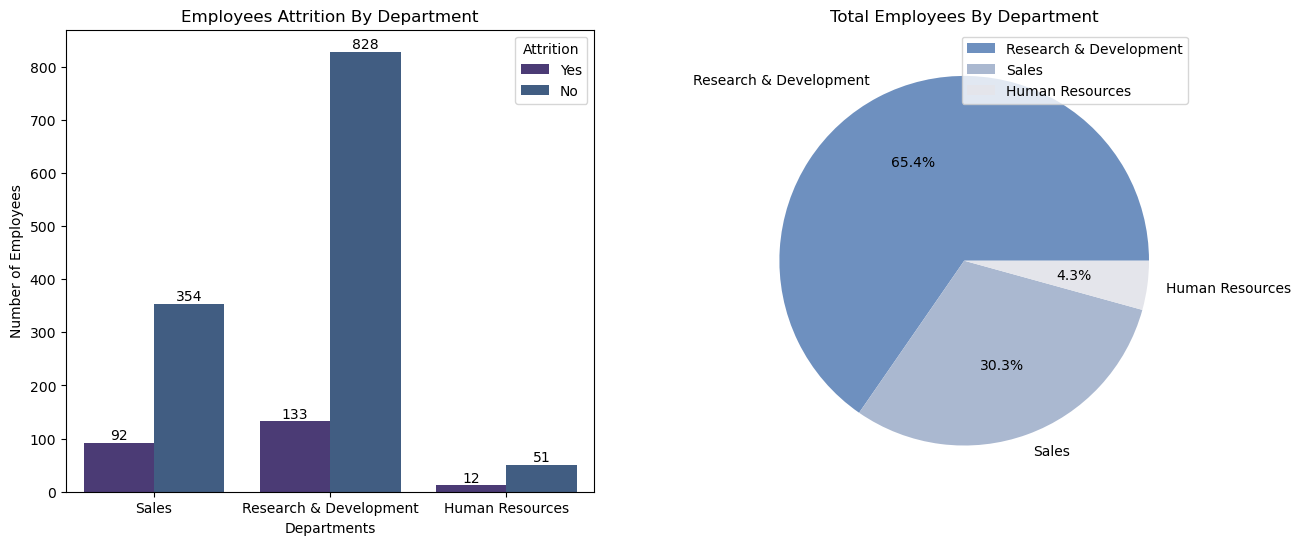

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=data, x='Department',hue='Attrition', palette =sns.color_palette('viridis'),ax=ax[0])
ax[0].set_xlabel('Departments')
ax[0].set_ylabel('Number of Employees')
ax[0].set_title('Employees Attrition By Department')
for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Department_count = data['Department'].value_counts()
ax[1].pie(Department_count, labels=Department_count.index, autopct='%1.1f%%',colors=sns.color_palette('vlag'))
ax[1].legend(labels=Department_count.index, loc='upper right')
ax[1].set_title('Total Employees By Department')

plt.show()

- 'Research & Development' department has the highest attrition with 133 employees, and also the highest no.of employees with 65.4% of all company's employees
- 'Sales' department has attrition with 92 employees, and also the second place in no.of employees with 30.3% of total employees
- 'Human Resources' department has the least attrition with only 12 employees, and also the least no.of employees with only 4.3% 
- This means that 'Sales' has the highest attrition with around 20.6% of the department employees, next 'Human Resources' with around 19.1%, then 'Research & Development' with around 13.8%

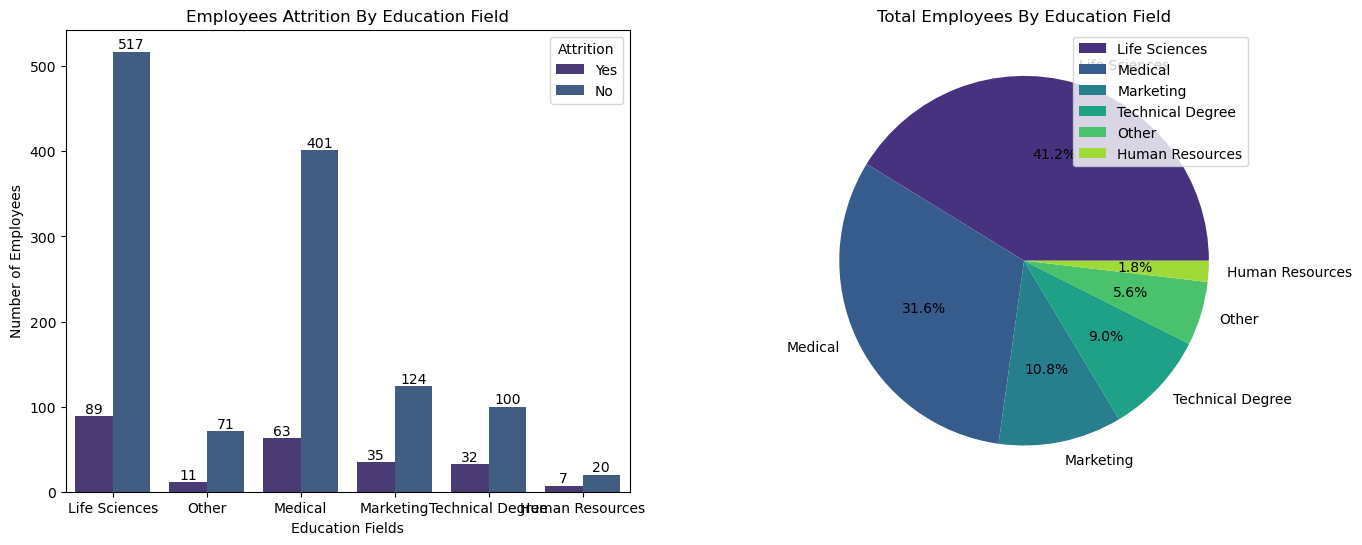

In [11]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.countplot(data=data, x='EducationField',hue='Attrition', palette =sns.color_palette('viridis'),ax=ax[0])
ax[0].set_xlabel('Education Fields')
ax[0].set_ylabel('Number of Employees')
ax[0].set_title('Employees Attrition By Education Field')
for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ef_count = data['EducationField'].value_counts()
ax[1].pie(ef_count, labels=ef_count.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
ax[1].legend(labels=ef_count.index, loc='upper right')
ax[1].set_title('Total Employees By Education Field')

plt.show()

- Employees with 'Life Sciences' and 'Medical' background and education are more as compared to other fields
- 'Human Resources' is the least field and that explains why there is very low number of employees in 'Human Resources' department which is 4.3%

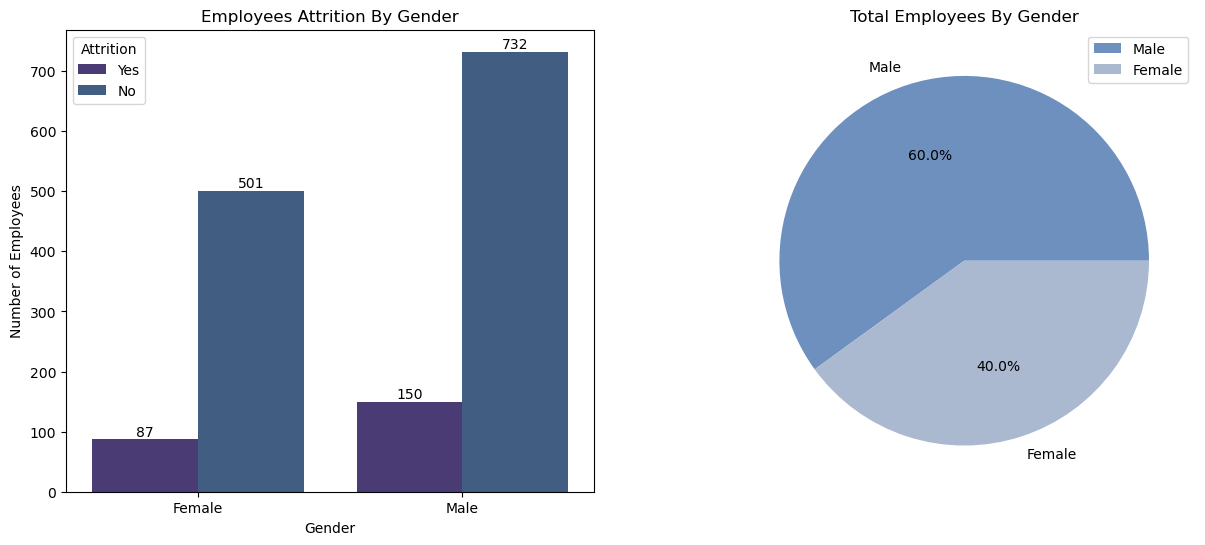

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=data, x='Gender',hue='Attrition', palette =sns.color_palette('viridis') ,ax=ax[0])
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of Employees')
ax[0].set_title('Employees Attrition By Gender')
for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Gender_count = data['Gender'].value_counts()
ax[1].pie(Gender_count, labels=Gender_count.index, autopct='%1.1f%%',colors=sns.color_palette('vlag'))
ax[1].legend(labels=Gender_count.index, loc='upper right')
ax[1].set_title('Total Employees By Gender')

plt.show()

- Male employees are more as compared to Females
- Males are more likely to quit the job rather than Females

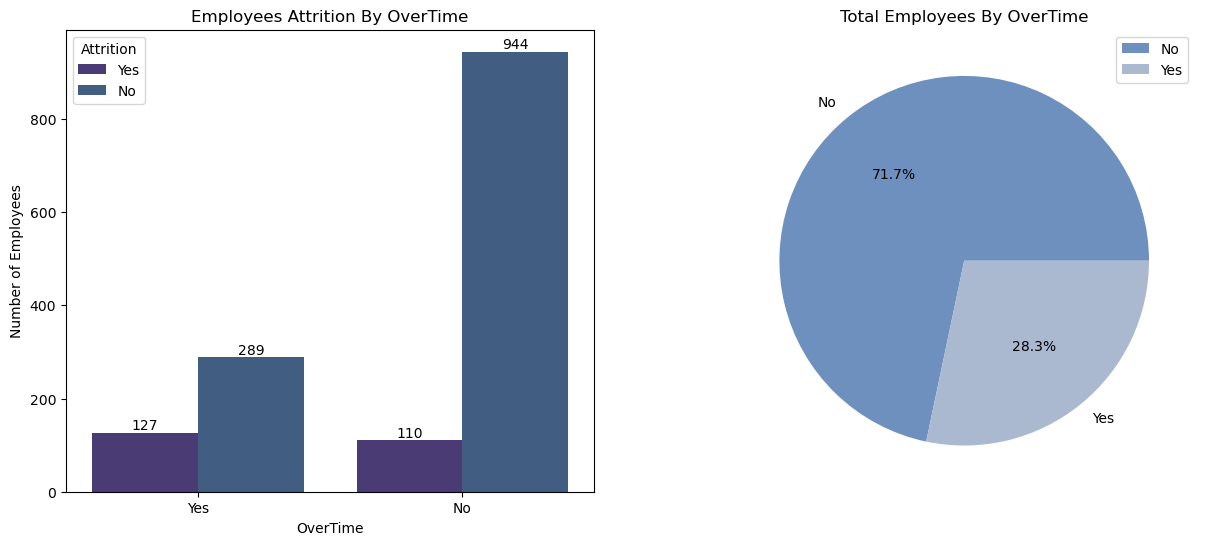

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=data, x='OverTime',hue='Attrition', palette =sns.color_palette('viridis'),ax=ax[0])
ax[0].set_xlabel('OverTime')
ax[0].set_ylabel('Number of Employees')
ax[0].set_title('Employees Attrition By OverTime')
for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

OverTime_count = data['OverTime'].value_counts()
ax[1].pie(OverTime_count, labels=OverTime_count.index, colors=sns.color_palette('vlag'), autopct='%1.1f%%')
ax[1].legend(labels=OverTime_count.index, loc='upper right')
ax[1].set_title('Total Employees By OverTime')

plt.show()

- As for 'Attrition' there is a minor difference between the employees who are doing overtime and who do no
- We can say that Overtime feature is not much affecting Attrition

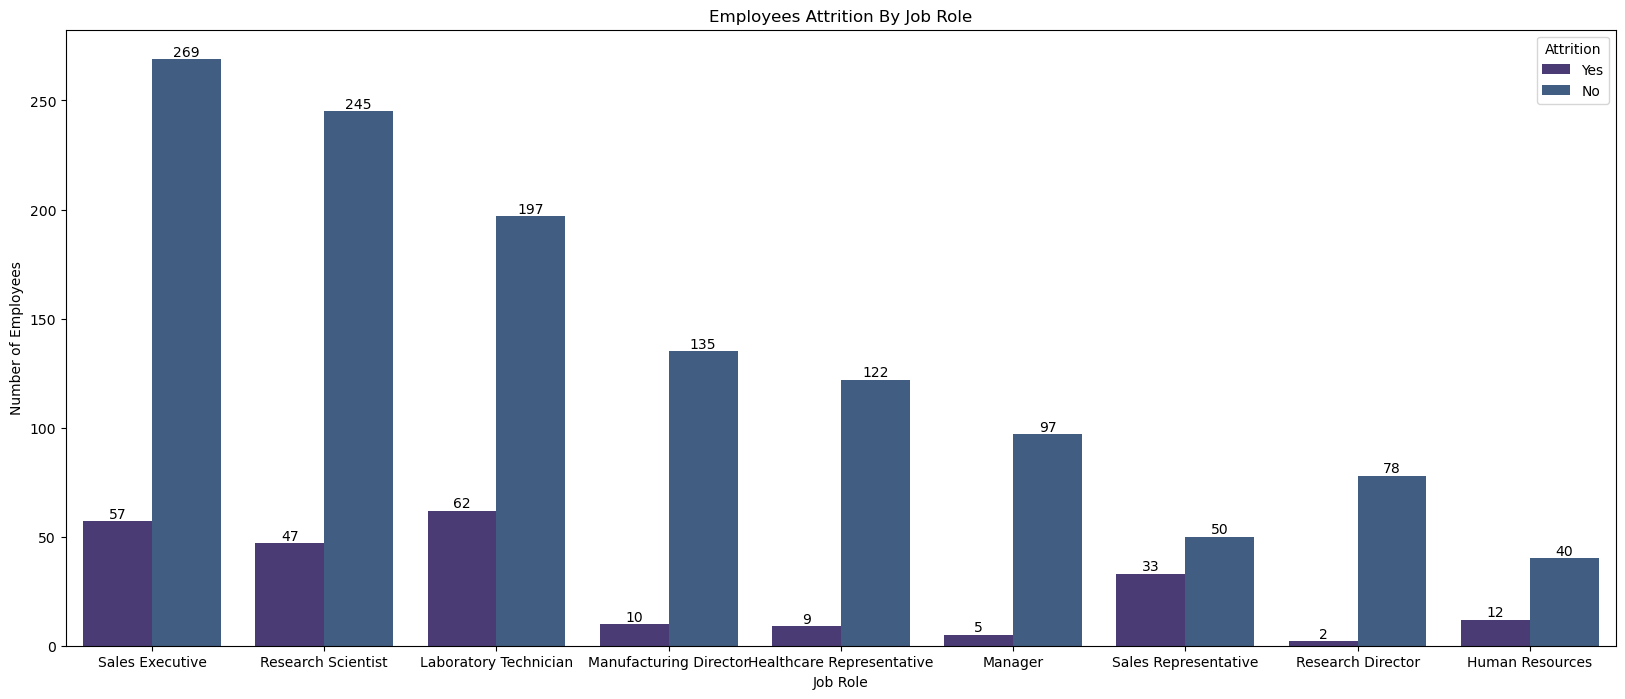

In [14]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=data, x='JobRole', hue='Attrition', palette=sns.color_palette('viridis'))
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.title('Employees Attrition By Job Role')
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

- There are less Research Directors, and Managers who leave the company 
- Laboratory Technician, Sales Executives, and Research Scientist are the top 3 job roles in which employees leave

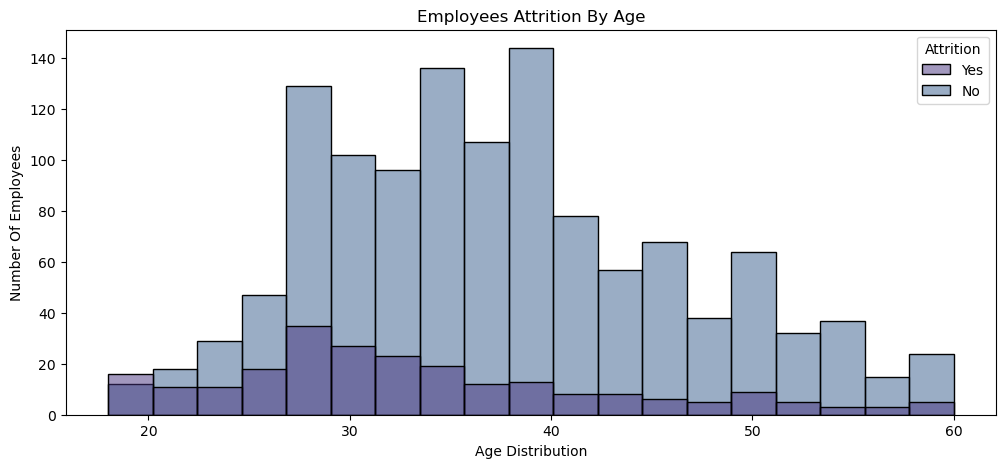

In [15]:
plt.figure(figsize=(12,5))
sns.histplot(x='Age', hue='Attrition', data=data, palette=sns.color_palette('viridis'))
plt.xlabel('Age Distribution')
plt.ylabel('Number Of Employees')
plt.title('Employees Attrition By Age')
plt.show()

- The distribution shows an inverse relationship it means the higher the age the less the employees attretion
- Employees in the age of 25-35 are more likely to leave the job

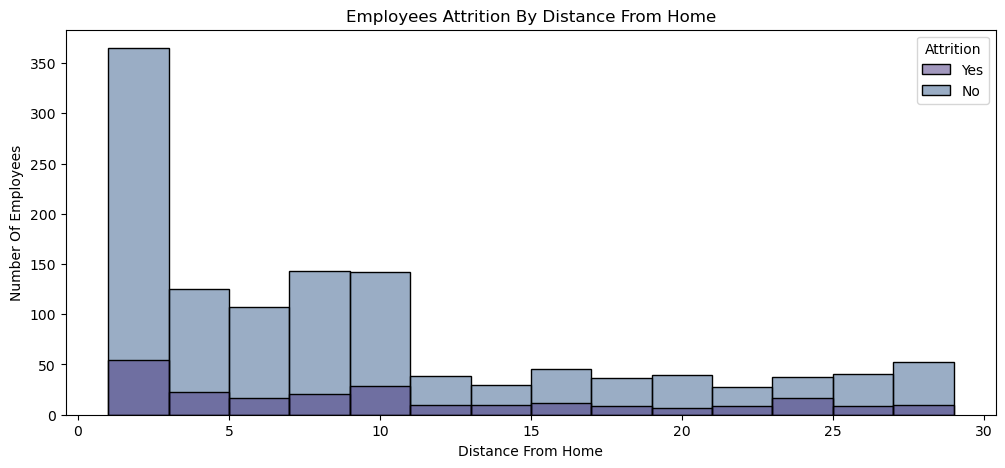

In [16]:
plt.figure(figsize=(12,5))
sns.histplot(x='DistanceFromHome', hue='Attrition', data=data, palette=sns.color_palette('viridis'))
plt.xlabel('Distance From Home')
plt.ylabel('Number Of Employees')
plt.title('Employees Attrition By Distance From Home')
plt.show()

- The major no.of employees are in the distance between 0-10KM
- The company strategy is to hire and keep people close to the working site
- The highest number of attrition is in the distance between 0-10 but not the highest percentage
- We can say that Distance From Home feature is not much affecting Attrition

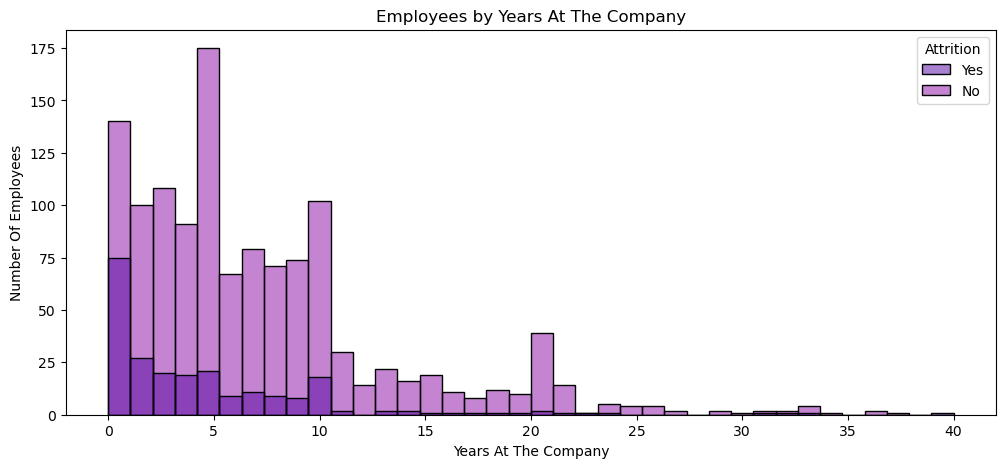

In [17]:
plt.figure(figsize=(12,5))
sns.histplot(x='YearsAtCompany', hue='Attrition', data=data, palette=sns.color_palette('plasma'))
plt.ylabel('Number Of Employees')
plt.xlabel('Years At The Company')
plt.title('Employees by Years At The Company')
plt.show()

- There is an inverse relationship between no.of employees and Years At The Company
- By increasing the Years At The Company the loyalety for the company increase and attrition decrease
- The most attritioned employees are between 0-5 years at the company 

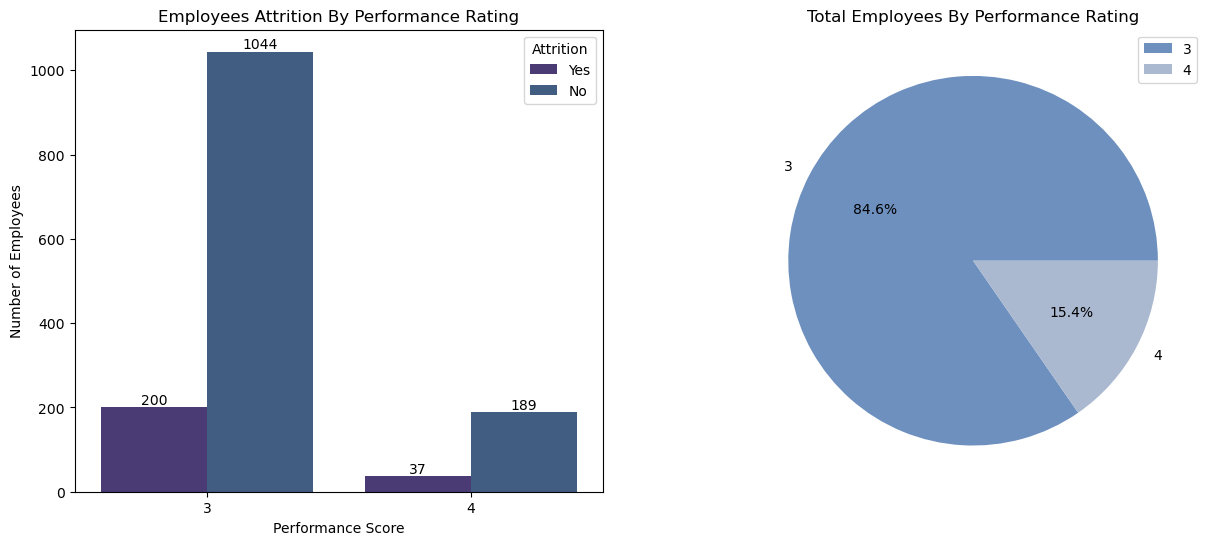

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=data, x='PerformanceRating',hue='Attrition', palette =sns.color_palette('viridis'),ax=ax[0])
ax[0].set_xlabel('Performance Score')
ax[0].set_ylabel('Number of Employees')
ax[0].set_title('Employees Attrition By Performance Rating')
for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

PerformanceRating_count = data['PerformanceRating'].value_counts()
ax[1].pie(PerformanceRating_count, labels=PerformanceRating_count.index, colors=sns.color_palette('vlag'), autopct='%1.1f%%')
ax[1].legend(labels=PerformanceRating_count.index, loc='upper right')
ax[1].set_title('Total Employees By Performance Rating')

plt.show()

- The performance rating lies between 3-4 which mean that most or all the employees are moderately performed
- However, employees having less performance rating or more likely to quit or we can say that company wants to fire such employees.
- The attritioned employees with performance 3 are around 16.1%, while performance 4 are 16.4%

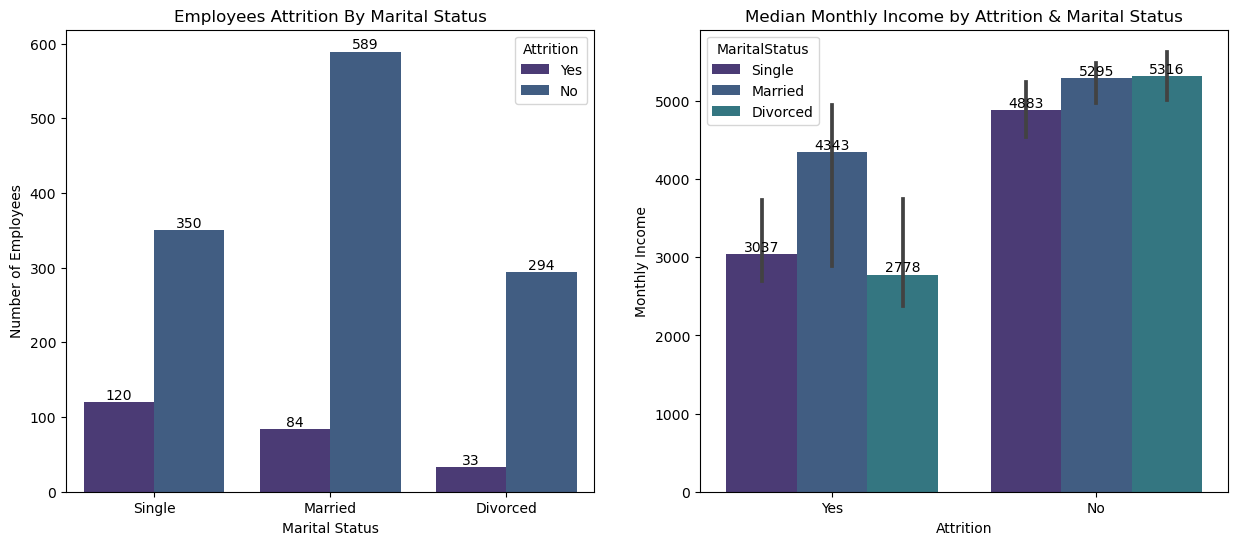

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.barplot(data=data, hue='MaritalStatus',x='Attrition',y='MonthlyIncome',
            palette =sns.color_palette('viridis'),estimator=median,ax=ax[1])
ax[1].set_xlabel('Attrition')
ax[1].set_ylabel('Monthly Income')
ax[1].set_title('Median Monthly Income by Attrition & Marital Status')
for p in ax[1].patches:
    ax[1].annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    
sns.countplot(data=data, x='MaritalStatus',hue='Attrition', palette =sns.color_palette('viridis'),ax=ax[0])
ax[0].set_xlabel('Marital Status')
ax[0].set_ylabel('Number of Employees')
ax[0].set_title('Employees Attrition By Marital Status')
for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.show()    
    

- We can conclude that people with less monthly income are likely to leave the organization than those with better income 
- Income represents as a big factor that affect Attrition
- Single employees are the highest numbers and percentage in attrition 
- company can keep more employees by raise monthly income by 1000 

## Coorelation Matrix

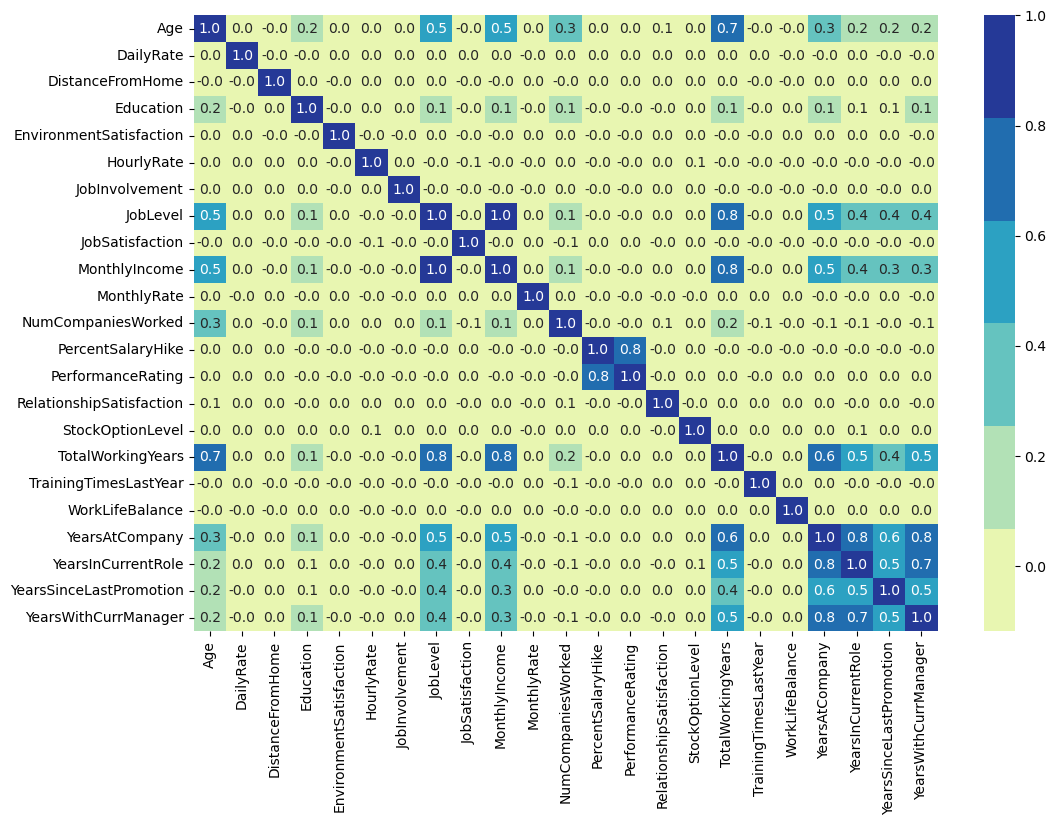

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True ,fmt='.1f', cmap=(sns.color_palette('YlGnBu')))
plt.show()

## Label Encoder 

In [21]:
hr = data.copy()

le = LabelEncoder()
encoded = ['BusinessTravel', 'Attrition', 'Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

for column in encoded:
    hr[column] = le.fit_transform(hr[column])
    
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## Balance the Data

In [22]:
x = hr.drop(columns=["Attrition"])
y = hr["Attrition"]

In [23]:
sm = SMOTE()
print('Unbalanced:', Counter(y))
x_sm, y_sm = sm.fit_resample(x, y)
print('Balanced:', Counter(y_sm))

Unbalanced: Counter({0: 1233, 1: 237})
Balanced: Counter({1: 1233, 0: 1233})


## Model Training

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=42)

In [25]:
# logistic Regression Model
lr = LogisticRegression(max_iter=1000)

# model training
lr.fit(x_train, y_train)

# model test
y_pred = lr.predict(x_test)

# print classification report get 
print(classification_report(y_test, y_pred, target_names = ["No","Yes"]))

# print matric to get F1-score
print('F1-score: ', f1_score(y_test, y_pred)*100,"%")

# print matric to get performance
print('Accuracy: ', lr.score(x_test, y_test)*100,"%")

              precision    recall  f1-score   support

          No       0.73      0.75      0.74       311
         Yes       0.74      0.72      0.73       306

    accuracy                           0.73       617
   macro avg       0.73      0.73      0.73       617
weighted avg       0.73      0.73      0.73       617

F1-score:  72.93729372937294 %
Accuracy:  73.41977309562398 %


In [26]:
# Gradient boost Model
gbc = GradientBoostingClassifier()

# model training
gbc.fit(x_train, y_train)

# model test
y_pred = gbc.predict(x_test)

# print classification report get 
print(classification_report(y_test, y_pred, target_names = ["No","Yes"]))

# print matric to get F1-score
print('F1-score: ', f1_score(y_test, y_pred)*100,"%")

# print matric to get performance
print('Accuracy: ', gbc.score(x_test, y_test)*100,"%")

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       311
         Yes       0.90      0.87      0.88       306

    accuracy                           0.89       617
   macro avg       0.89      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617

F1-score:  88.37209302325581 %
Accuracy:  88.6547811993517 %


In [27]:
# Random Forest Model
rfc = RandomForestClassifier()

# model training
rfc.fit(x_train, y_train)

# model test
y_pred = rfc.predict(x_test)

# print classification report get 
print(classification_report(y_test, y_pred, target_names = ["No","Yes"]))

# print matric to get F1-score
print('F1-score: ', f1_score(y_test, y_pred)*100,"%")

# print matric to get performance
print('Accuracy: ', rfc.score(x_test, y_test)*100,"%")

              precision    recall  f1-score   support

          No       0.90      0.91      0.90       311
         Yes       0.91      0.89      0.90       306

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617

F1-score:  90.0990099009901 %
Accuracy:  90.27552674230147 %


In [31]:
# Decision Tree Model
dtc = DecisionTreeClassifier()

# model training
dtc.fit(x_train, y_train)

# model test
y_pred = dtc.predict(x_test)

# print classification report get 
print(classification_report(y_test, y_pred, target_names = ["No","Yes"]))

# print matric to get F1-score
print('F1-score: ', f1_score(y_test, y_pred)*100,"%")

# print matric to get performance
print('Accuracy: ', dtc.score(x_test, y_test)*100,"%")

              precision    recall  f1-score   support

          No       0.83      0.74      0.78       311
         Yes       0.76      0.84      0.80       306

    accuracy                           0.79       617
   macro avg       0.80      0.79      0.79       617
weighted avg       0.80      0.79      0.79       617

F1-score:  80.12422360248448 %
Accuracy:  79.2544570502431 %
